In [1]:
import requests
import matplotlib.pyplot as plt
from io import BytesIO

In [2]:
class GoogleDownloader:
    def __init__(self, access_token):
        self.access_token = access_token
        self.url = 'https://maps.googleapis.com/maps/api/staticmap?center={},{}&zoom={}&size=400x400&maptype=satellite&key={}'
    
    def download(self, lat, long, zoom):
        res = requests.get(self.url.format(lat, long, zoom, self.access_token))
        # server needs to make image available, takes a few seconds
        if res.status_code == 403:
            return 'RETRY'
        assert res.status_code < 400, print(f'Error - failed to download {lat}, {long}, {zoom}')
        image = plt.imread(BytesIO(res.content))
        return image

In [4]:
api_key_path = "/Users/aishwaryawahane/Desktop/API_key.txt"
api_key = open(api_key_path, 'r').readlines()[0].strip()

In [ ]:
lat = str(-2.532818)
long = str(29.684726)
zoom = str(16)

In [5]:
gmap = GoogleDownloader(api_key)

In [6]:
image_demo = gmap.download(lat, long, zoom)

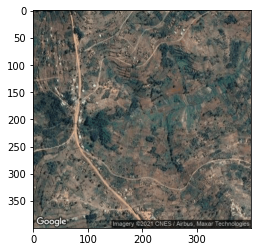

In [8]:
plt.imshow(image_demo)